# ♋Skin Cancer Detection | CNN (img + csv)
### Python · SIIM Melanoma Prep Data, ISIC 2024 - Skin Cancer Detection with 3D-TBP

### IMPORTING OF LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING OF DATA FILES

In [2]:
df = pd.read_csv('train-metadata.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_22668\3034796033.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train-metadata.csv')


In [3]:
df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [5]:
df.shape

(401059, 55)

### DUPLICATE VALUE TREATMENT

In [6]:
df.duplicated().sum()

0

### NULL VALUE TREATMENT

In [7]:
df.isnull().sum()

isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

In [8]:
df['age_approx'].fillna(df['age_approx'].mean(), inplace=True)
df['sex'].fillna('male', inplace=True)
df['anatom_site_general'].fillna('posterior torso', inplace=True)

In [9]:
df.drop(columns=['lesion_id','iddx_2','iddx_3','iddx_4','iddx_5','mel_mitotic_index','mel_thick_mm'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 48 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    401059 non-null  float64
 4   sex                           401059 non-null  object 
 5   anatom_site_general           401059 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [11]:
df.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
target,401059.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
age_approx,401059.0,58.0,14.0,5.0,50.0,60.0,70.0,85.0
clin_size_long_diam_mm,401059.0,4.0,2.0,1.0,3.0,3.0,4.0,28.0
tbp_lv_A,401059.0,20.0,4.0,-2.0,17.0,20.0,22.0,48.0
tbp_lv_Aext,401059.0,15.0,4.0,-9.0,12.0,15.0,17.0,37.0
tbp_lv_B,401059.0,28.0,5.0,-1.0,25.0,28.0,32.0,54.0
tbp_lv_Bext,401059.0,27.0,4.0,9.0,24.0,27.0,30.0,48.0
tbp_lv_C,401059.0,35.0,6.0,3.0,31.0,35.0,38.0,59.0
tbp_lv_Cext,401059.0,31.0,5.0,12.0,28.0,31.0,34.0,54.0
tbp_lv_H,401059.0,55.0,6.0,-2.0,52.0,55.0,58.0,106.0


### SEGREGATING OBJECT VALUUES & NUMERICAL VALUES COLUMNS

In [12]:
# Select object data type columns
df1 = df.select_dtypes(include=['object'])

# Select non-object data type columns
df = df.select_dtypes(exclude=['object'])

print("df1:")
print(df1)
print("\ndf:")
print(df)

df1:
             isic_id  patient_id     sex anatom_site_general  \
0       ISIC_0015670  IP_1235828    male     lower extremity   
1       ISIC_0015845  IP_8170065    male           head/neck   
2       ISIC_0015864  IP_6724798    male     posterior torso   
3       ISIC_0015902  IP_4111386    male      anterior torso   
4       ISIC_0024200  IP_8313778    male      anterior torso   
...              ...         ...     ...                 ...   
401054  ISIC_9999937  IP_1140263    male      anterior torso   
401055  ISIC_9999951  IP_5678181    male     posterior torso   
401056  ISIC_9999960  IP_0076153  female      anterior torso   
401057  ISIC_9999964  IP_5231513  female      anterior torso   
401058  ISIC_9999967  IP_6426047    male     lower extremity   

                image_type tbp_tile_type          tbp_lv_location  \
0       TBP tile: close-up     3D: white        Right Leg - Upper   
1       TBP tile: close-up     3D: white              Head & Neck   
2       TBP tile: c

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   target                        401059 non-null  int64  
 1   age_approx                    401059 non-null  float64
 2   clin_size_long_diam_mm        401059 non-null  float64
 3   tbp_lv_A                      401059 non-null  float64
 4   tbp_lv_Aext                   401059 non-null  float64
 5   tbp_lv_B                      401059 non-null  float64
 6   tbp_lv_Bext                   401059 non-null  float64
 7   tbp_lv_C                      401059 non-null  float64
 8   tbp_lv_Cext                   401059 non-null  float64
 9   tbp_lv_H                      401059 non-null  float64
 10  tbp_lv_Hext                   401059 non-null  float64
 11  tbp_lv_L                      401059 non-null  float64
 12  tbp_lv_Lext                   401059 non-nul

### SAMPLING

In [14]:
X = df.drop(columns='target')
y = df['target']
X

,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,...,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,tbp_lv_dnn_lesion_confidence
0,60.0,3.04,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,...,9.307003,0.000000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,97.517282
1,60.0,1.10,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,...,3.354148,0.000000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,3.141455
2,60.0,3.40,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,...,8.886309,0.000000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,99.804040
3,65.0,3.22,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,...,9.514499,0.664690,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,99.989998
4,55.0,2.73,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,52.041180,...,6.467562,0.000000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,70.0,6.80,22.574335,14.944666,27.663259,26.767135,35.705132,30.656525,50.784168,60.824438,...,20.210836,2.328066,7.054819,2.169398,0.288920,100,147.187256,1182.317505,122.652588,99.999988
401055,60.0,3.11,19.977640,16.026870,34.158840,31.011870,39.571870,34.908400,59.678970,62.670170,...,9.340242,1.048147,1.879502,2.910780,0.460000,25,52.349740,1393.187000,127.261700,99.999820
401056,65.0,2.05,17.332567,12.364397,29.845326,26.500073,34.513206,29.242644,59.854275,64.987196,...,5.999862,0.607554,1.702824,2.205272,0.183099,40,54.622246,1065.263672,-106.833740,99.999416
401057,30.0,2.80,22.288570,9.564721,28.431200,27.012250,36.126360,28.655640,51.905420,70.501540,...,9.113276,1.078204,3.680175,1.957157,0.161850,140,-9.861557,877.527000,-76.982120,100.000000


In [15]:
y

0         0
1         0
2         0
3         0
4         0
         ..
401054    0
401055    0
401056    0
401057    0
401058    0
Name: target, Length: 401059, dtype: int64

In [17]:
# importing the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
X.shape, X_train.shape, X_test.shape,y.shape,y_train.shape,y_test.shape

((401059, 35), (320847, 35), (80212, 35), (401059,), (320847,), (80212,))

### MODEL FITTING

In [20]:
model = LogisticRegression(max_iter=1000)

In [21]:
# training the LogisticRegression model with Training data
model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### METRICS FOR TRAIN DATA

In [22]:
# accuracy on training data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print(training_data_accuracy)

0.9990182236393047


In [23]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  99.9 %


In [24]:
cf_matrix = confusion_matrix(y_train,y_train_prediction)
print(cf_matrix)

[[320525      8]
 [   307      7]]


In [25]:
tp, fp, fn, tn = cf_matrix.ravel()
print(tp, fp, fn, tn)

320525 8 307 7


<Axes: >

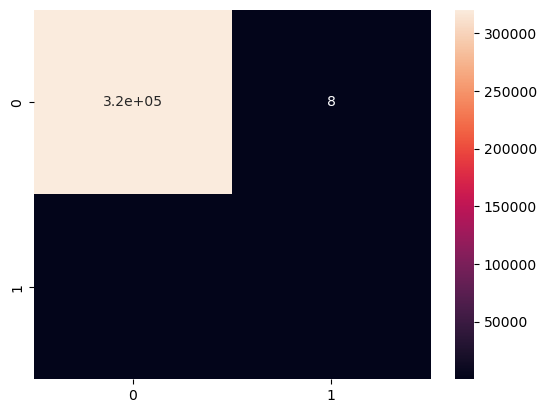

In [26]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

### METRICS FOR TEST DATA

In [27]:
# accuracy on training data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print(test_data_accuracy)

0.998977709070962


In [28]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  99.9 %


In [29]:
cf_matrix = confusion_matrix(y_test,y_test_prediction)
print(cf_matrix)

[[80130     3]
 [   79     0]]


In [30]:
tp, fp, fn, tn = cf_matrix.ravel()
print(tp, fp, fn, tn)

80130 3 79 0


<Axes: >

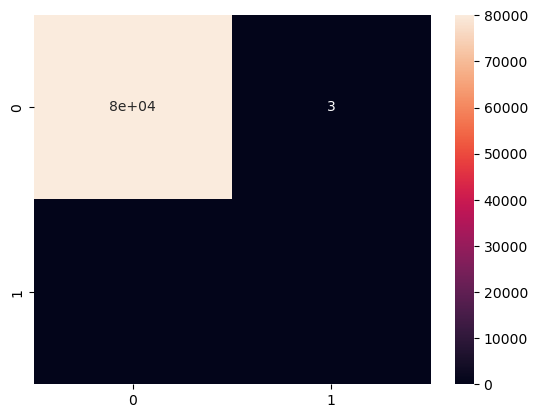

In [31]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

### CLASSIFICATION REPORT FOR TRAIN DATA

In [32]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320533
           1       0.47      0.02      0.04       314

    accuracy                           1.00    320847
   macro avg       0.73      0.51      0.52    320847
weighted avg       1.00      1.00      1.00    320847



### CLASSIFICATION REPORT FOR TEST DATA

In [33]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80133
           1       0.00      0.00      0.00        79

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212



### AUC & ROC SCORE 

In [34]:
y_probs = model.predict_proba(X_test)[:, 1]

In [35]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC Score: {auc_roc:.2f}')

AUC-ROC Score: 0.89


In [36]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [37]:
# Calculate AUC-ROC score
auc_roc = auc(fpr, tpr)

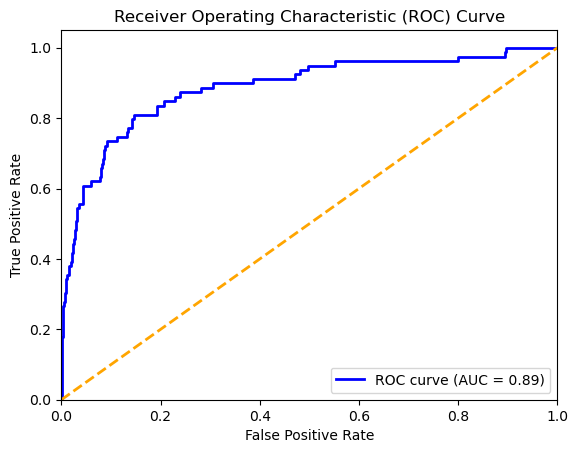

In [38]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
# Define the range for the partial AUC
fpr_range = (0.0, 0.2)  
# Find the indices within the specified FPR range
indices = np.where((fpr >= fpr_range[0]) & (fpr <= fpr_range[1]))

In [40]:
# Calculate the partial AUC
partial_auc = auc(fpr[indices], tpr[indices])

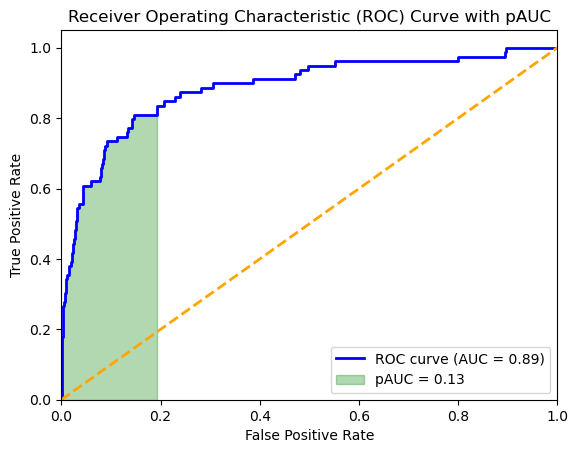

In [41]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.fill_between(fpr[indices], tpr[indices], alpha=0.3, color='green', label=f'pAUC = {partial_auc:.2f}')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with pAUC')
plt.legend(loc='lower right')
plt.show()

In [42]:
final = pd.concat([df1, df], ignore_index=True)

In [43]:
final.shape

(802118, 48)

In [44]:
Xf=final.tail(401059).values

In [45]:
X=final.head(401059).values

In [46]:
X.shape

(401059, 48)

In [47]:
y.shape

(401059,)

In [48]:
# Ensure that y_test_prediction and df are of the same length
if len(y_test_prediction) == len(final):
    # Assign predictions to the DataFrame
    final['target'] = y_test_prediction
else:
    print("Lengths do not match. Please check your predictions and DataFrame.")

# New DataFrame for submission with specific columns 
submission_df = final[['isic_id','target']]  

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
print("Submission file created successfully.")

Lengths do not match. Please check your predictions and DataFrame.
Submission file created successfully.


In [49]:
submission_df.head(10)

,isic_id,target
0,ISIC_0015670,NaN
1,ISIC_0015845,NaN
2,ISIC_0015864,NaN
3,ISIC_0015902,NaN
4,ISIC_0024200,NaN
5,ISIC_0035502,NaN
6,ISIC_0051648,NaN
7,ISIC_0051665,NaN
8,ISIC_0051710,NaN
9,ISIC_0051758,NaN


In [50]:
submission_df.tail(10)

,isic_id,target
802108,NaN,0.0
802109,NaN,0.0
802110,NaN,0.0
802111,NaN,0.0
802112,NaN,0.0
802113,NaN,0.0
802114,NaN,0.0
802115,NaN,0.0
802116,NaN,0.0
802117,NaN,0.0


********************************************************************DONE****************************************************